# Position Player fWAR
___

           {    (Batting Runs + Base Running Runs + Fielding Runs +        }
    fWAR = {  Positional Adjustment + League Adjustment +Replacement Runs) }
           {                      / (Runs Per Win)                         }


## Dynamic inputs

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import fantasy_machine

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
con = sqlite3.connect(fantasy_machine.config.mlb_db_path)

# df = pd.read_sql_query("""SELECT * 
#                        FROM {} 
#                        WHERE (gameid like '%OAK%' OR vteam='OAK')
#                        """.format('bevent'),
#                        con=con)
df = pd.read_sql_query("""SELECT * 
                       FROM {}
                       WHERE gameid like '%2018%'
                       """.format('bevent'),
                       con=con)

play_defs = {
     0:'Unknown event',
     1:'No event',
     2:'Generic out',
     3:'Strikeout',
     4:'Stolen base',
     5:'Defensive indifference',
     6:'Caught stealing',
     7:'Pickoff error',
     8:'Pickoff',
     9:'Wild pitch',
     10:'Passed ball',
     11:'Balk',
     12:'Other advance',
     13:'Foul error',
     14:'Walk',
     15:'Intentional walk',
     16:'Hit by pitch',
     17:'Interference',
     18:'Error',
     19:'Fielders choice',
     20:'Single',
     21:'Double',
     22:'Triple',
     23:'Home run',
     24:'Missing play'}

## Batting Runs
___
    player’s:
        wOBA
        PA
        home park factor 
    League: 
        Average wOBA (lgwOBA)
        the wOBA Scale
        MLB R/PA (lgR/PA)
        Specific league (AL or NL) wRC and PA for non-pitchers
___
    >> wRAA = ((wOBA – lgwOBA)/wOBA Scale) * PA
    >>> Batting Runs = wRAA + (lgR/PA – (PF*lgR/PA))*PA + (lgR/PA – (AL or NL non-pitcher wRC/PA))*PA

In [3]:
calc = fantasy_machine.model.metric_calculator(data=df)

In [4]:
df['year'] = df['gameid'].apply(lambda x: int(x[3:7]))

### BATTER

In [65]:
team_id = 'ANA'

team = list(set(
    list(set(df[(df['year'] == 2018) & (df['gameid'].str.contains(team_id)) & (df['battingteam'] == 1)]['batter'])) + 
    list(set(df[(df['year'] == 2018) & (df['vteam']==team_id) & (df['battingteam'] == 0)]['batter']))
))

In [66]:
for player_id in team:
    print('{}:\t{}'.format(player_id, calc.calculate(player_ids=[player_id], metric='wOBA')))

penaf002:	0.0
pujoa001:	0.299432323232
hermm001:	0.269177419355
calhk001:	0.283316939891
blasj001:	0.163044444444
gratj001:	0.272222222222
wardt002:	0.255081632653
mcgud001:	0.293333333333
valbl001:	0.252849122807
troum001:	0.446699312715
bricj001:	0.299913385827
maldm001:	0.274982587065
youne003:	0.241324786325
hudsj002:	0.17725
younc004:	0.268409448819
barrj003:	0.0
johns002:	0.0654545454545
cowak001:	0.203532258065
arcif001:	0.276896226415
kinsi001:	0.29793258427
ohtas001:	0.389711538462
despo001:	0.176
fontn001:	0.22675
uptoj001:	0.34814379085
heana001:	0.11
schir001:	0.487285714286
simma001:	0.326001675042
martj007:	0.280832535885
river003:	0.298373626374
cozaz001:	0.289296442688
fernj004:	0.303886178862
fletd002:	0.297049342105


In [71]:
player_ids = df['batter'].tolist()

In [ ]:
p_stats = {}
# for player_id in team:
for player_id in player_ids:
    p_stats.update({player_id:[calc.calculate(player_ids=[player_id], metric='BA'),
                calc.calculate(player_ids=[player_id], metric='SLG'),
                calc.calculate(player_ids=[player_id], metric='wOBA'),
                calc.calculate(player_ids=[player_id], metric='wRAA')]})

fantasy_machine/model/baseball_stats.py:124: RuntimeWarning: invalid value encountered in double_scalars
  value = (b1+(b2*2)+(b3*3)+(hr*4))/ab
fantasy_machine/model/baseball_stats.py:100: RuntimeWarning: invalid value encountered in double_scalars
  (ab+bb-ibb+sf+hbp))


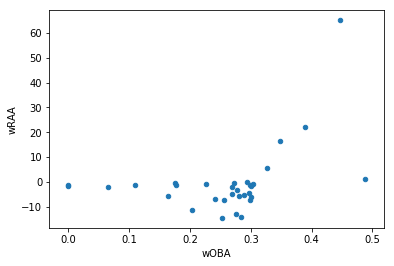

In [75]:
pd.DataFrame.from_dict(p_stats,
                       orient='index',
                       columns=['BA','SLG','wOBA','wRAA']).plot(kind='scatter',
                                                         x='wOBA',
                                                         y='wRAA')

### PITCHER

In [62]:
team_id = 'SFN'

team = list(set(
    list(set(df[(df['year'] == 2018) & (df['gameid'].str.contains(team_id)) & (df['battingteam'] == 0)]['pitcher'])) + 
    list(set(df[(df['year'] == 2018) & (df['vteam']==team_id) & (df['battingteam'] == 1)]['pitcher']))
))

In [64]:
for player_id in team:
    print('{}:\t{}'.format(player_id, calc.calculate(player_ids=[player_id], metric='FIP')))

blacr001:	3.97528571429
beedt001:	4.33491304348
gomer002:	2.08957142857
okers001:	2.75190909091
strih001:	4.286
rodrd001:	3.68494366197
holld003:	3.76800389105
moror001:	3.05330769231
johnp001:	4.44344274809
smitw002:	1.84024528302
melam001:	3.23792307692
law-d001:	5.336
valdj003:	9.961
samaj001:	5.37741791045
strac001:	4.45755172414
dysos001:	3.43114218009
kellc001:	4.09057746479
bumgm001:	3.92449614396
osicj001:	5.911
sneld001:	9.39176923077
cuetj001:	4.70816981132
sandp001:	3.161
blact002:	3.73403370787
darnc001:	3.161
suara002:	4.28366112266
gearc001:	4.2598372093
watst001:	2.31251515152


In [52]:
p_stats = {}
for player_id in team:
    p_stats.update({player_id:[calc.calculate(player_ids=[player_id], metric='IP'),
                calc.calculate(player_ids=[player_id], metric='FIP'),
                calc.calculate(player_ids=[player_id], metric='WHIP')]})

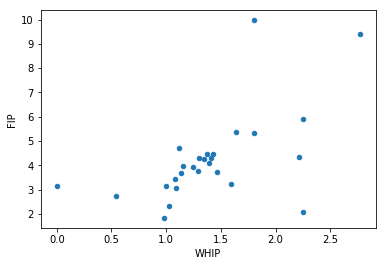

In [61]:
pd.DataFrame.from_dict(p_stats,
                       orient='index',
                       columns=['IP','FIP','WHIP']).plot(kind='scatter',
                                                         x='WHIP',
                                                         y='FIP')